In [ ]:
import pandas as pd

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/students_data.csv")

In [ ]:
data=data.iloc[:,1:]

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Math
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Math
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Math
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Math
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,Por
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,Por
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,Por
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,Por


**Задание 1**
Для каждого признака определите, к какому типу он относится.

In [ ]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
Subject       object
dtype: object

Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.
Note: Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.

In [ ]:
for i in data.columns:  #выводим уникальные значения для каждого столбца
  print(set(data[i]))

{'GP', 'MS'}
{'F', 'M'}
{15, 16, 17, 18, 19, 20, 21, 22}
{'R', 'U'}
{'LE3', 'GT3'}
{'T', 'A'}
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}
{'services', 'at_home', 'other', 'health', 'teacher'}
{'services', 'at_home', 'other', 'health', 'teacher'}
{'course', 'other', 'home', 'reputation'}
{'father', 'other', 'mother'}
{1, 2, 3, 4}
{1, 2, 3, 4}
{0, 1, 2, 3}
{'no', 'yes'}
{'yes', 'no'}
{'yes', 'no'}
{'yes', 'no'}
{'no', 'yes'}
{'no', 'yes'}
{'yes', 'no'}
{'yes', 'no'}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 38, 40, 54, 56, 75}
{0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{0, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
{0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
{'Por', 'Math'}


Эти данные можно сравнить с данными блокнота, что мы и сделали. **Вывод:** в столбце failure есть опечатки, в виде значений 0 и 3


In [ ]:
# failures - number of past class failures (numeric: n if 1<=n<3, else 4)
# в failures должны быть значения 1,2,4. Поэтому можно выкинуть (drop) данные с ошибкой, но мы это не сделали, хотя могли, так как это испортит наши графики и их анализ
# data.drop(data.loc[data['failures'] == 0].index, axis=0, inplace=True)   #выкидываем ошибочные значения из таблицы
# data.drop(data.loc[data['failures'] == 3].index, axis=0, inplace=True)
# могли также поменять на эти значения 4
# data['failure'] = data['failure'].str.replace('0', '4')
# data['failure'] = data['failure'].str.replace('3', '4')


При необходимости, приведите признак к определенному вами типу

**Ответ:** такой необходимости нет, но можем показать, что умеем менять тип)



In [ ]:
data['studytime'].astype('float64')  #меняем типо с целочисленного на дробный

0       2.0
1       2.0
2       2.0
3       3.0
4       2.0
       ... 
1039    3.0
1040    2.0
1041    2.0
1042    1.0
1043    1.0
Name: studytime, Length: 1044, dtype: float64

**Задание 2**

Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?

In [ ]:
data.isnull().sum()   #считаем сумму пропусков

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Subject       0
dtype: int64

Пропущенных значений нет

**Задание 3**
Посчитайте базовые статистики для числовых признаков. Дайте комментарий.


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


в значениях absences максимальное значние пропусков равно75, а среднее значение 4.5

Это значит, что существует большой разброс в значениях столбика и максимум сильно отличается от других значений.

Можем удалить это max значение, чтобы было удобнее (в целом просто, чтобы показать, что мы знаем, как удалять ).

п.с. А также это значение может быть ошибкой(но не является, мы проверили))


In [ ]:
data2=data.drop(data.loc[data['absences'] == 75].index, axis=0) #удаляем значение

In [ ]:
data2.describe() #новые базовые статистики для новой таблицы

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,16.724832,2.603068,2.388303,1.522531,1.970278,0.264621,3.935762,3.203260,3.158198,1.494727,2.285714,3.541707,4.367210,11.214765,11.248322,11.344199
std,1.239941,1.125379,1.100400,0.731929,0.834753,0.656405,0.933846,1.029744,1.151190,0.912023,1.285105,1.424671,5.815325,2.984588,3.285910,3.865969
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


Сколько студентов посещают каждую из школ?

In [ ]:
data['school'].value_counts()

GP    772
MS    272
Name: school, dtype: int64

In [ ]:
fig1 = px.histogram(data_frame = data, x = 'school', color='school') # график по школам, который отражает, где большее кол-во
fig1.show()


In [ ]:
data.groupby('school')['Subject'].count()  #если нужно использовать groupby

school
GP    772
MS    272
Name: Subject, dtype: int64

Сколько студентов посещают математику, сколько - португальский?

In [ ]:
data['Subject'].value_counts()

Por     649
Math    395
Name: Subject, dtype: int64

In [ ]:
fig1 = px.histogram(data_frame = data, x = 'Subject', color='Subject')
fig1.show()

In [ ]:
data.groupby('Subject')['school'].count()     #если нужно использовать groupby

Subject
Math    395
Por     649
Name: school, dtype: int64

Какой предмет заваливают чаще?

In [ ]:
data.groupby('Subject')['failures'].sum().sort_values(ascending=False).head(1)
#с учетом сортировки от большего к меньшему, выводит максимальное значение, которому соответствует португальский язык


Subject
Por    144
Name: failures, dtype: int64

Сколько в среднем времени в неделю уходит на учебу по каждому предмету?

In [ ]:
data.groupby('Subject')['studytime'].mean() #группируем по предметам и времени на учёбу и считаем среднее значение

Subject
Math    2.035443
Por     1.930663
Name: studytime, dtype: float64

На что чаще обращают внимание при выборе школы?

In [ ]:
data.groupby('reason')['school'].count().sort_values(ascending=False).head(1)
#с учетом сортировки от большего к меньшему, выводит максимальное значение, которому соответствует причина course


reason
course    430
Name: school, dtype: int64

**Задание 4**

Оцените распределение оценок (отдельно для G1, G2 и G3). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.

Tip: Для выполнения задания постройте и опишите гистограммы.



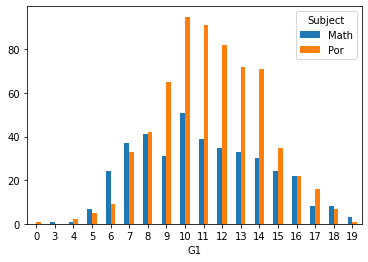

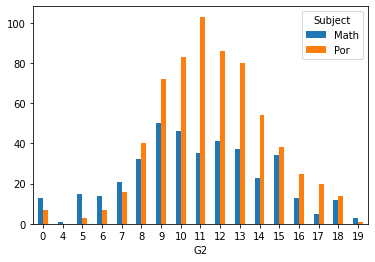

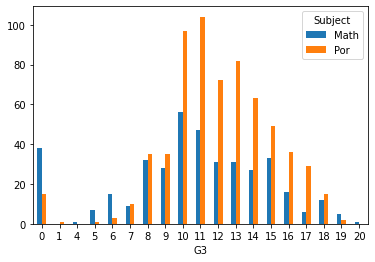

In [ ]:
for i in ['G1', 'G2', 'G3']:
    fig4 = pd.crosstab(data[i], data['Subject'])   #создаём крос таблицу
    fig4.plot(kind = 'bar', rot = 0)
    fig4


Распределение является нормальным. Оценки и по португальскому и по математике концнтрируются в среднем диапазоне. Посмотрев на оценки относительно медианы(10), можно сказать, что оценок выше среднего больше, однако в последнем графики по математике можно увидеть относительно большое отклонение(многие получили 0, наверное, было что-то сложное).

**Задание 5**
Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?




In [ ]:
data['AllAlc'] = data['Dalc']+data['Walc'] #создаём столбик с значениями потребления алкоголя в целом (и в будни и в выходные)

In [ ]:
data.groupby('sex')['AllAlc'].sum()

sex
F    1902
M    2043
Name: AllAlc, dtype: int64

In [ ]:
data.groupby('sex')['AllAlc'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,591.0,3.218274,1.467641,2.0,2.0,3.0,4.0,10.0
M,453.0,4.509934,2.316355,2.0,2.0,4.0,6.0,10.0


In [ ]:
data.groupby('sex')['AllAlc'].sum().sort_values(ascending=False).head(1)
#группируем столбцы пол и кол-во алкоголя, вычисляем сумму(объёмы, потребляемого алкоголя), сортируем и берём самое большое значние

sex
M    2043
Name: AllAlc, dtype: int64

In [ ]:
data.groupby('sex')['AllAlc'].count().sort_values(ascending=False).head(1)
#группируем столбцы пол и кол-во алкоголя, вычисляем кол-во(как часто потребляют алкоголь), сортируем и берём самое большое значние

sex
F    591
Name: AllAlc, dtype: int64

sex,F,M
AllAlc,,
2,266,125
3,125,57
4,82,77
5,71,47
6,28,57
7,12,37
8,5,21
9,0,10
10,2,22


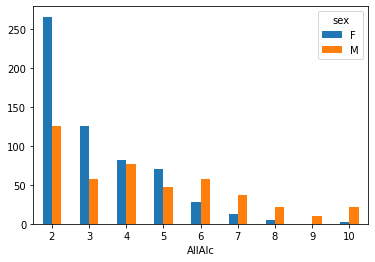

In [ ]:
fig5 = pd.crosstab(data['AllAlc'],data['sex'])  #сторим график, показывающий по y-кол-во людей, употребляющих алкоголь в объёме х за неделю.
fig5.plot(kind = 'bar', rot = 0)
fig5


**Вывод:** Женщины пьют чаще, а мужчины больше по объёму

Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. (Используйте метод groupby). Дайте комментарий.


In [ ]:
priz=['address', 'Pstatus', 'higher', 'romantic', 'freetime']
for i in priz:
  print(data.groupby(i)['AllAlc'].describe())

         count      mean       std  min  25%  50%  75%   max
address                                                     
R        285.0  3.964912  2.013729  2.0  2.0  3.0  5.0  10.0
U        759.0  3.708827  1.975660  2.0  2.0  3.0  5.0  10.0
         count      mean       std  min  25%  50%  75%   max
Pstatus                                                     
A        121.0  3.570248  2.052748  2.0  2.0  3.0  5.0  10.0
T        923.0  3.806067  1.979364  2.0  2.0  3.0  5.0  10.0
        count      mean       std  min  25%  50%  75%   max
higher                                                     
no       89.0  4.483146  2.340903  2.0  2.0  4.0  6.0  10.0
yes     955.0  3.713089  1.940787  2.0  2.0  3.0  5.0  10.0
          count      mean       std  min  25%  50%  75%   max
romantic                                                     
no        673.0  3.763744  1.935506  2.0  2.0  3.0  5.0  10.0
yes       371.0  3.805930  2.083414  2.0  2.0  3.0  5.0  10.0
          count      mea

In [ ]:
fig3=px.box(data_frame=data,   #строим ящик с усами для значений потребления алкоголя людьми, с разным объёмом свободного времени
              x='freetime',
              y='AllAlc',
              title="Boxplot",
              labels={'AllAlc':'alcohol', 'freetime':'free time after school'}
              )
fig3

**Adress** в среднем в сельской местности выпивают больше и разброс данных об обоих регионах практически равен, что должно означать, что в сельской местности больше пьют. Однако, если расматривать кол-во раз потребления алкоголя, то городские жители пьют чаще.

**Pstatus**  По данным видно, что больше пьют люди, чьи родители вместе. Среднее кол-во, выпитого алкоголя больше и частота потребления алкоголя в 8раз выше.

**higher**  Сравнивая среднии значения,медианы и третии квартили можем сказать, что люди, нежелающие получить высшее образование в среднем пьют больше и пьют за раз больше. А основываясь на столбце count, можно сказать, что люди, желающие получать высшее образование пьют чаще.

**romantic **  Практически все значения равны, можем сказать, что люди, не состоящие в отношениях пьют чаще.

**freetime**  Можем сделать вывод, что чаще всего выпивают люди, у которых есть свободное время, но не очень много. Но люди, у которых свободного времени больше, хотя и пьют реже, но больше по объёмам.


In [ ]:
priz=['address', 'Pstatus', 'higher', 'romantic', 'freetime']
for i in priz:
  print(data.groupby(i)['AllAlc'].sum().sort_values(ascending=True))
  # группируем кол-во алкоголя группируется с одним из столбцов и высчитывается сумма, выпитого алкоголя и ранжирается

address
R    1130
U    2815
Name: AllAlc, dtype: int64
Pstatus
A     432
T    3513
Name: AllAlc, dtype: int64
higher
no      399
yes    3546
Name: AllAlc, dtype: int64
romantic
yes    1412
no     2533
Name: AllAlc, dtype: int64
freetime
1     222
5     482
2     599
4    1195
3    1447
Name: AllAlc, dtype: int64


Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте комментарий.

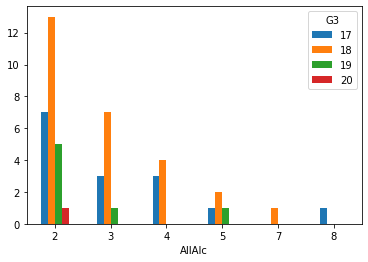

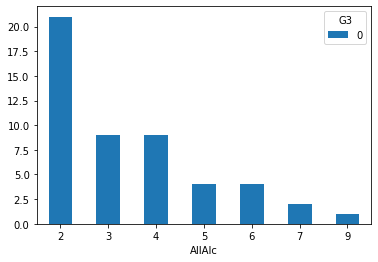

In [ ]:
direct_sorted = data.sort_values('G3', ascending = False).head(50)  #ранжирование значений итоговой оценки от большего к меньшему и оставляем 50 первых
reverse_sorted = data.sort_values('G3', ascending = True).head(50)  #ранжирование значений итоговой оценки от меньшего к большему и оставлием 50 первых

fig6 = pd.crosstab(direct_sorted['AllAlc'], direct_sorted['G3']) #сторим график для первых 50 человек
fig6.plot(kind = 'bar', rot=0)
fig6

fig7= pd.crosstab(reverse_sorted['AllAlc'], reverse_sorted['G3'])  #сторим график для последних 50 человек
fig7.plot(kind = 'bar', rot = 0)
fig7

group_data = data.groupby(by = 'Subject') #разделение по предметам

**Вывод:**

Судя по графикам, употребление алкоголя никак не сказывается на успеваемости студентов. Но можно заметить, что чем больше показатель кол-ва выпитого алкоголя, тем меньше студентов принадлежат этому показателю. Более того, стоит отметить, что среди студентов с наилучшей успеваимостью нет людей с показателем потребления алкоголя, равным 9 и более, а у студентов с худшей - есть.


**Задание 6**

Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:

Отлично: 18 <= G3 <= 20

Хорошо: 14 <= G3 <= 17

Удовлетворительно: 8 <= G3 <= 13

Неудовлетворительно: G3 < 8

In [ ]:
grades = []   #список, который станет столбцом
for i in data['G3']:   #сравнение всех значений столбца G3
    if 18 <= i <= 20:
        grades.append('5')
    elif 14 <= i <= 17:
        grades.append('4')
    elif 8 <= i <= 13:
        grades.append('3')
    elif i < 8:
        grades.append('2')

data['G4'] = grades   #список превращаем в столбец


In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Subject,AllAlc,G4
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Math,2,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Math,2,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Math,5,3
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Math,2,4
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Math,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,Por,3,3
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,Por,2,4
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,Por,2,3
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,Por,7,3


Оцените распределение (постройте гистограммы) нового признака в зависимости от признака reason (причина выбора школы). Дайте содержательный комментарий.


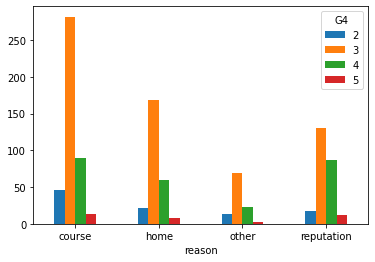

In [ ]:
fig8 = pd.crosstab(data['reason'], data['G4'])   #график причин и кол-ва разных оценок у людей, назвавших эти причины
fig8.plot(kind = 'bar', rot = 0)
fig8
group_data = data.groupby(by = 'reason')

In [ ]:
fig = px.scatter(   #строим диаграмму рассеяния
data,
x='reason',
y='G4',
color='reason',  #разные цвета для разных причин для наглядности
)
fig.show()

Судя по графику histogramm (график №1), различия лишь в кол-ве оценок, что в целом никак не зависит от причин. Это доказывается на графике scatter(график №2), на котором видно, что точки друг от друга равноудалены и равномерно распределены, то есть, для каждой оценки *G4* есть все причины *reason*.  

**Задание 7 (по желанию)**

Творческая часть работы. Поищите другие закономерности в данных. По возможности постройте графики. Дайте содержательный комментарий.

Рассматриваем зависимость оценок от кол-ва свободного времени и пропусков

In [ ]:
# fig = px.scatter_3d(data, x='G4', y='freetime', z='absences',       #рассматриваем график зависимости значений трёх столбцов
#                     color='freetime', size='absences', size_max=40)    #выбираем цвет и размер каких данных будет меняться, а также максимальный размер точек
# fig.show()

In [ ]:
# data_new=data.drop(data.loc[data['absences'] == 75].index, axis=0)  #по графику заметили большое значение, которое нам мешает

In [ ]:
# fig = px.scatter_3d(data_new, x='G4', y='freetime', z='absences', color='freetime', size='absences', size_max=40)  #график по трём переменным, но уже без мешающего значения
# fig.show()

In [ ]:
data_new=data_new.drop(data.loc[data['absences'] == 56].index, axis=0)
data_new=data_new.drop(data.loc[data['absences'] == 54].index, axis=0)  #удаляем ещё два больших значения, которые мешают

In [ ]:
# fig = px.scatter_3d(data_new, x='G4', y='freetime', z='absences', color='freetime', size='absences', size_max=40)  #строим график по 3 переменным
# fig.show()

Мы удалили подозрительные значения, которые мешают анализу данных.

Можно заметить, что чем, больше свободного времени и меньше пропусков, тем лучше оценка. Также с уменьшением кол-ва свободного времени, пропусков становится явно меньше, а оценка от этого не увеличивается.  